# EDA and Visualizations

## Table of Contents
- [Data Prep](#Data-Prep)
- [Most Common Words Overall and by Subreddit](#Most-Common-Words-Overall-and-by-Subreddit)

After our three scripts for sourcing, cleaning, and preprocessing our data have run, we are ready to perform Exploratory Data Analysis and create visualizations of our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 
import json

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# Data Reading
df = pd.read_csv('../data/preprocessed_subreddit_data.csv')
df.dropna(inplace=True)

with open('../data/stop_words.json', 'r') as fp:
    stop_words = json.load(fp)

### Data Prep

In [4]:
df['fulltext'] = df['title'] + ' ' + df['selftext']

In [5]:
freefolk = df[df['subreddit']=='freefolk']
gameofthrones = df[df['subreddit']=='gameofthrones']
asoiaf = df[df['subreddit']=='asoiaf']

In [7]:
df_vec = CountVectorizer(stop_words=stop_words['words'],
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))

df_tab = df_vec.fit_transform(df['fulltext'])
df_pd = pd.DataFrame(df_tab.toarray(), columns=df_vec.get_feature_names())

In [8]:
ff_vec = CountVectorizer(stop_words=stop_words['words'],
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))
ff_tab = ff_vec.fit_transform(freefolk['fulltext'])
ff_pd = pd.DataFrame(ff_tab.toarray(), columns=ff_vec.get_feature_names())

In [9]:
got_vec = CountVectorizer(stop_words=stop_words['words'],
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))

got_tab = got_vec.fit_transform(gameofthrones['fulltext'])
got_pd = pd.DataFrame(got_tab.toarray(), columns=got_vec.get_feature_names())

In [10]:
asoiaf_vec = CountVectorizer(stop_words=stop_words['words'],
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))

asoiaf_tab = asoiaf_vec.fit_transform(asoiaf['fulltext'])
asoiaf_pd = pd.DataFrame(asoiaf_tab.toarray(), columns=asoiaf_vec.get_feature_names())

In [11]:
most_common_overall = df_pd.mean().sort_values(ascending=False)[0:100]

most_common_ff = ff_pd.mean().sort_values(ascending=False)[0:100]

most_common_got = got_pd.mean().sort_values(ascending=False)[0:100]

most_common_asoiaf = asoiaf_pd.mean().sort_values(ascending=False)[0:100]

### Most Common Words Overall and by Subreddit

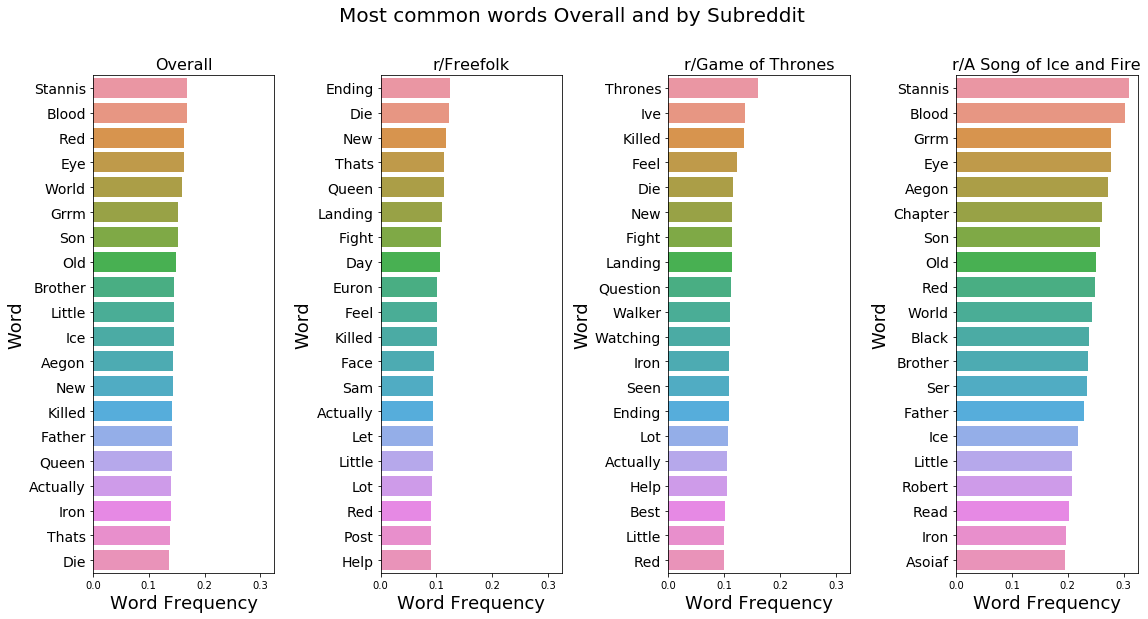

In [19]:
tables = [most_common_overall,most_common_ff,most_common_got,most_common_asoiaf]
titles = ['Overall','r/Freefolk','r/Game of Thrones','r/A Song of Ice and Fire']

fig, ax = plt.subplots(1,4, sharex=True, figsize=(16,8))
axs = ax.ravel()
fig.suptitle('Most common words Overall and by Subreddit', fontsize=20, y=1.07)
for i, ax in enumerate(axs):
    plt.setp(ax.get_yticklabels(), fontsize=14)
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel('Word Frequency', fontsize=18)
    ax.set_ylabel('Word', fontsize=18)
    sns.barplot(tables[i][0:20],tables[i].index.str.title()[0:20], orient='h',ax=ax)
fig.tight_layout()

We know that r/asoiaf is somewhat overrepresented in our data, so it's no surprise that three of its top four words (Stannis, Blood, and Eye) are overrepresented in the Overall data.

